<a href="https://colab.research.google.com/github/MattLanzUnimib/DataScienceLab/blob/main/DsLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import datetime as dt

In [3]:
columns = ['data','totaleintero','totaledecimale','settore']

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/MattLanzUnimib/DataScienceLab/main/serie-storiche-ecommerce.csv", index_col=False, quotechar="'")

In [5]:
df['totale'] = df['totale'].str.replace(',', '.')
df['totale'] = pd.to_numeric(df['totale'])

In [6]:
df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year

In [7]:
dist_settore = df.groupby(['settore','year'], as_index=False)['totale'].agg(['count','mean','std','min','max'])


In [8]:
dist_settore.reset_index(inplace=True)

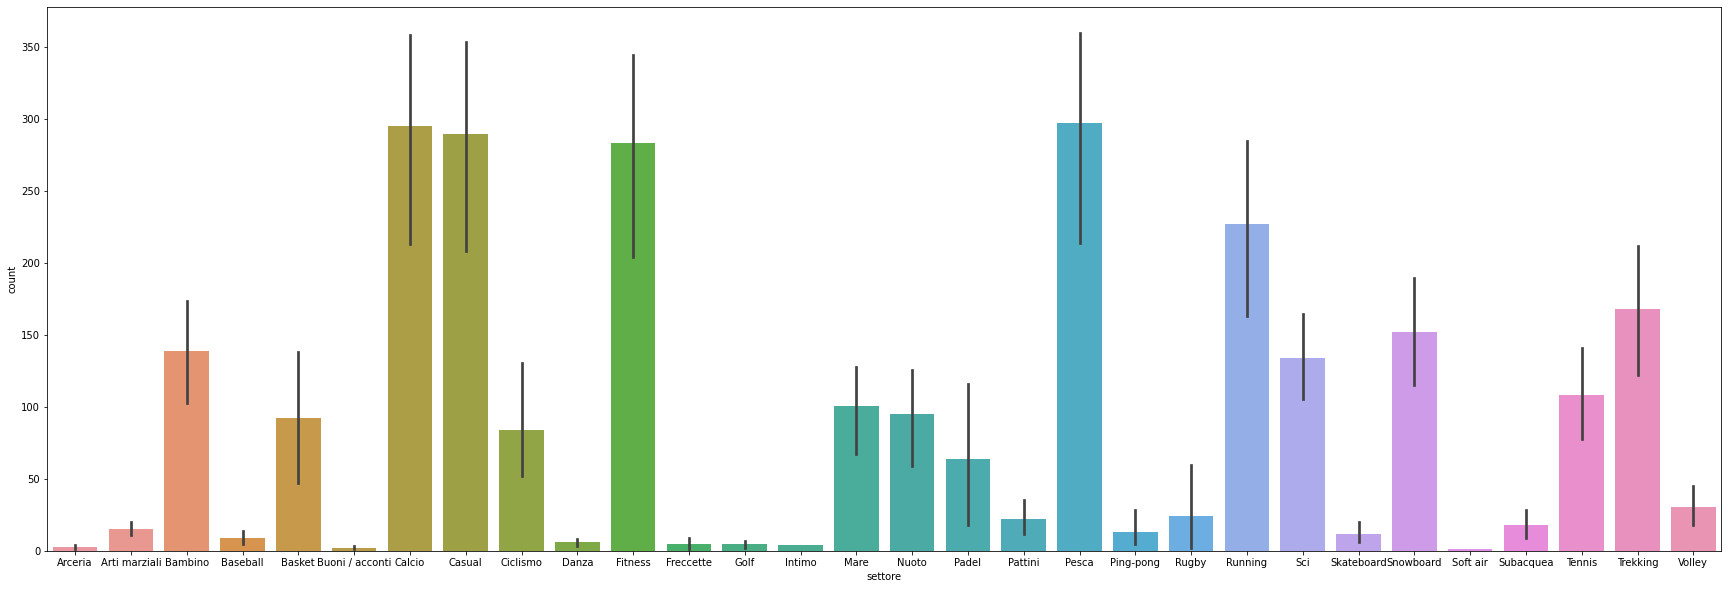

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(data=dist_settore, x='settore', y='count')


In [57]:
settori= pd.Series(pd.unique(df['settore']))

In [59]:
settori = settori.sort_values()

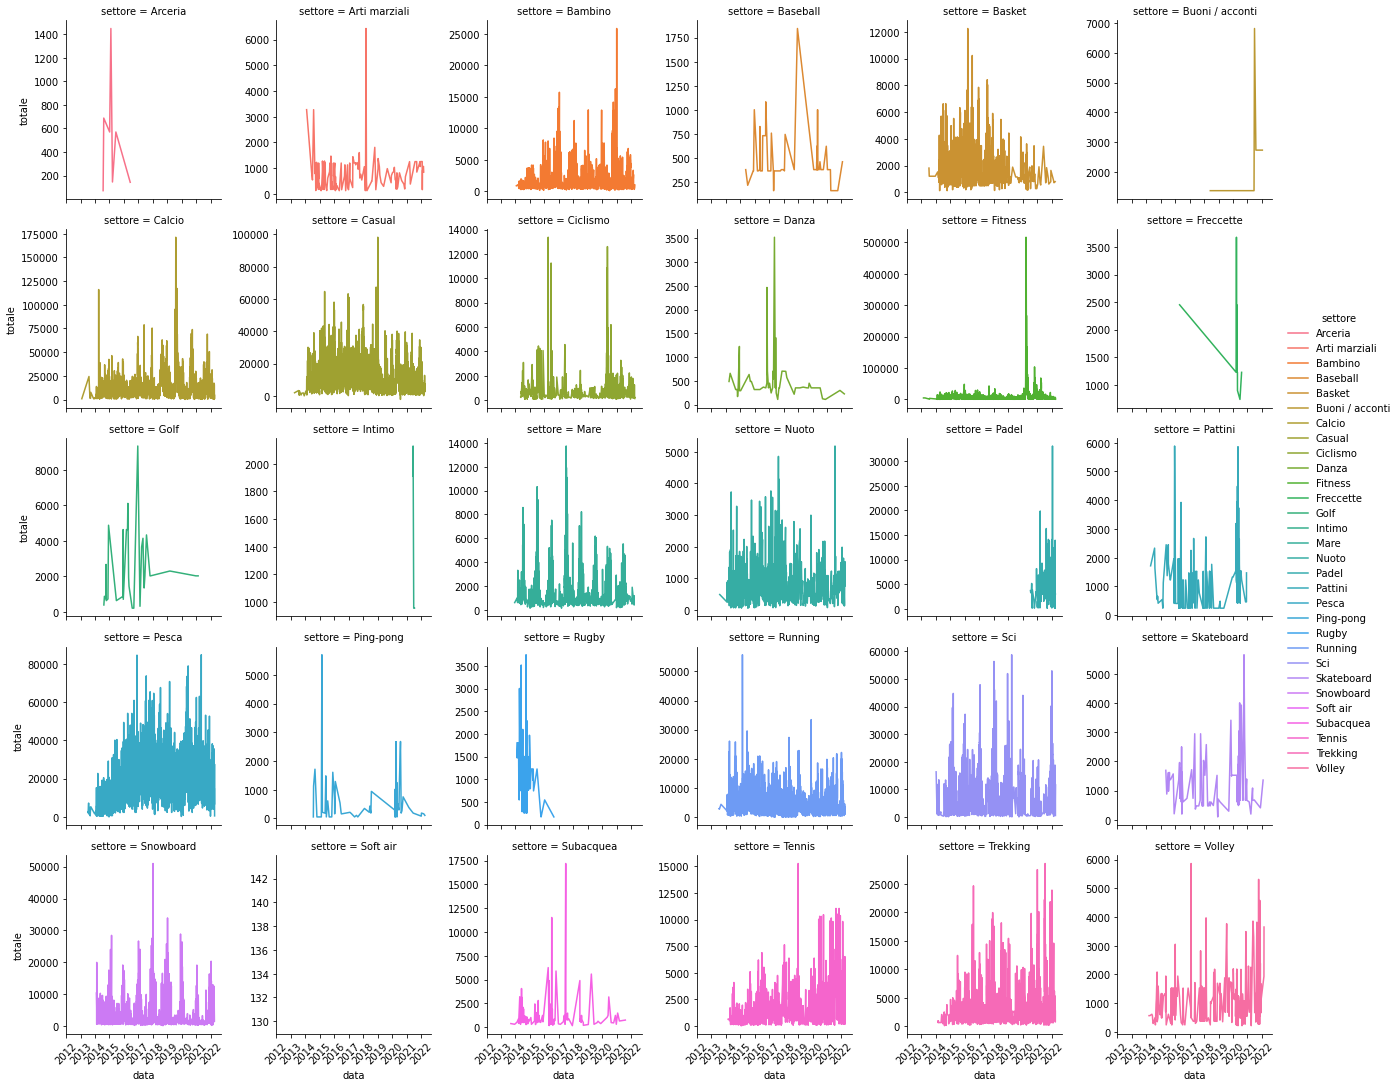

<Figure size 9000x7200 with 0 Axes>

In [62]:
graph = sns.FacetGrid(df.sort_values('settore'), col ="settore", sharey=False, col_wrap=6, hue='settore')
# map the above form facetgrid with some attributes
graph.map(sns.lineplot, 'data','totale').add_legend()
graph.set_xticklabels(rotation=45)
# show the object
plt.figure(figsize=(30, 24), dpi=300)
plt.show()

In [82]:
arti_marziali = df[df['settore'] == 'Arti marziali']

In [85]:
arti_marziali[arti_marziali['year'] == 2018]

,data,totale,settore,year
12782,2018-01-31,1053.67,Arti marziali,2018
12957,2018-02-24,122.81,Arti marziali,2018
12974,2018-02-26,122.81,Arti marziali,2018
13033,2018-03-04,1053.67,Arti marziali,2018
13132,2018-03-14,6432.53,Arti marziali,2018
13232,2018-03-26,488.76,Arti marziali,2018
13343,2018-04-07,122.81,Arti marziali,2018
14361,2018-08-05,488.76,Arti marziali,2018
14412,2018-08-11,488.76,Arti marziali,2018
15038,2018-10-22,1807.69,Arti marziali,2018


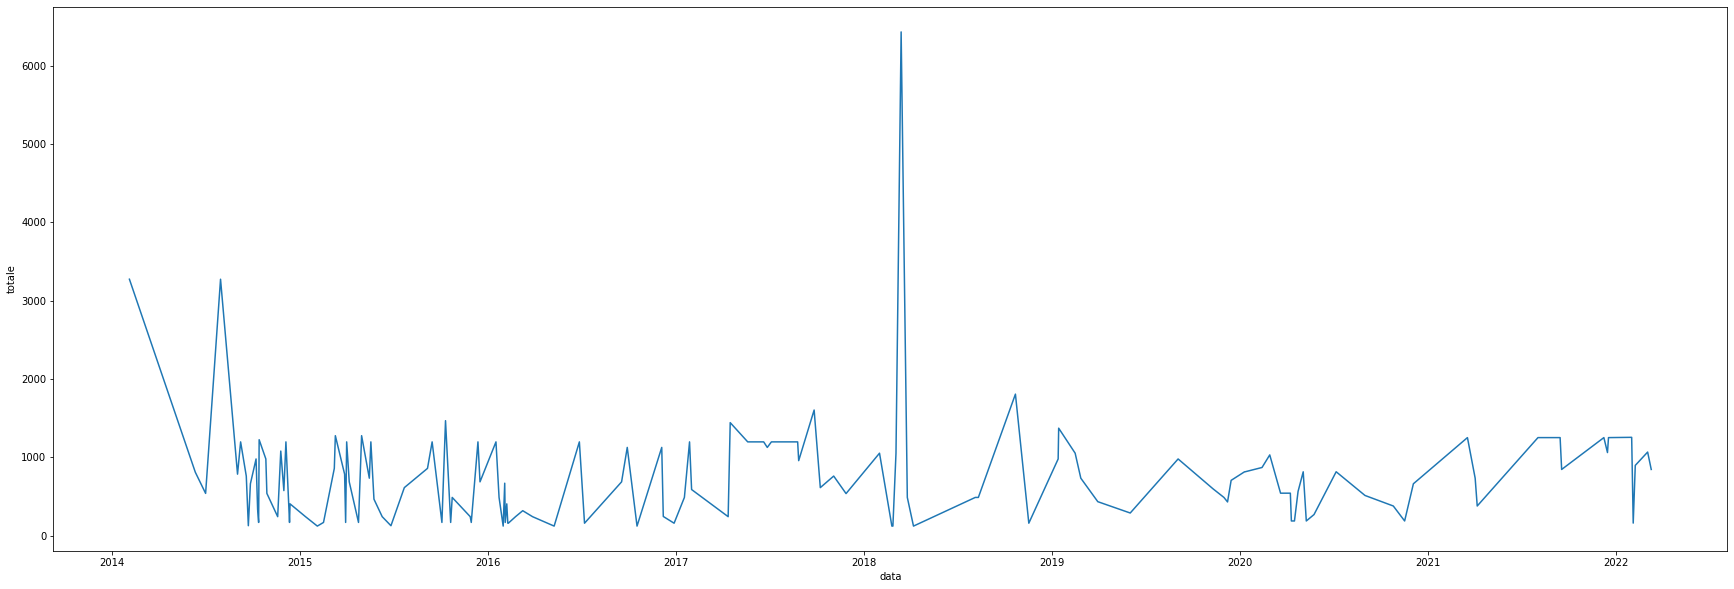

In [84]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.lineplot(data=arti_marziali, x='data', y='totale')

# Fare tabella delle frequenze (crosstable?)